# k-均值算法

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=200,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1)

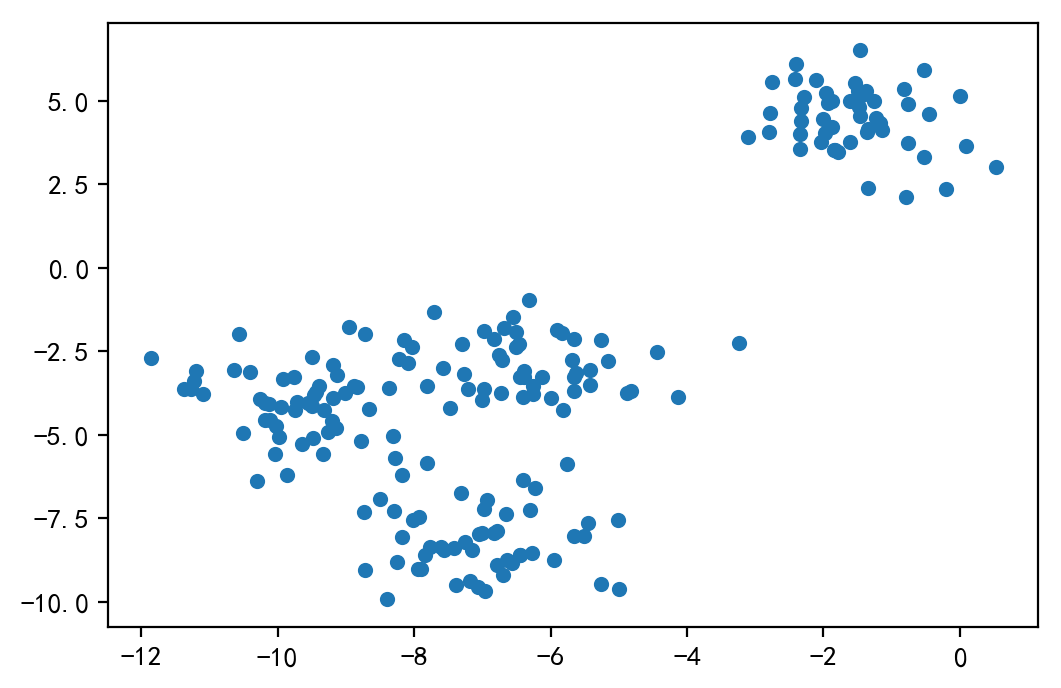

In [2]:
plt.figure(figsize=(6, 4), dpi=100)
plt.scatter(X[:, 0], X[:, 1], s=20, marker='o')
# plt.xticks(())
# plt.yticks(())
plt.show()

使用 $3$ 个聚类中心，：[scikit-learn 文档](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)，[中文文档](http://sklearn.apachecn.org/#/docs/22)。

In [3]:
from sklearn.cluster import KMeans

n_clusters = 3

kmean = KMeans(n_clusters=n_clusters)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

计算训练样本到其所属的聚类中心点的距离的总和（注意 scikit-learn 里面不是平均值）。

In [4]:
kmean.score(X)

-668.2828657568906

In [5]:
int(kmean.score(X))

-668

# 可视化

In [6]:
labels = kmean.labels_
centers = kmean.cluster_centers_

In [7]:
centers

array([[-1.54465562,  4.4600113 ],
       [-7.15632049, -8.05234186],
       [-8.03529126, -3.42354791]])

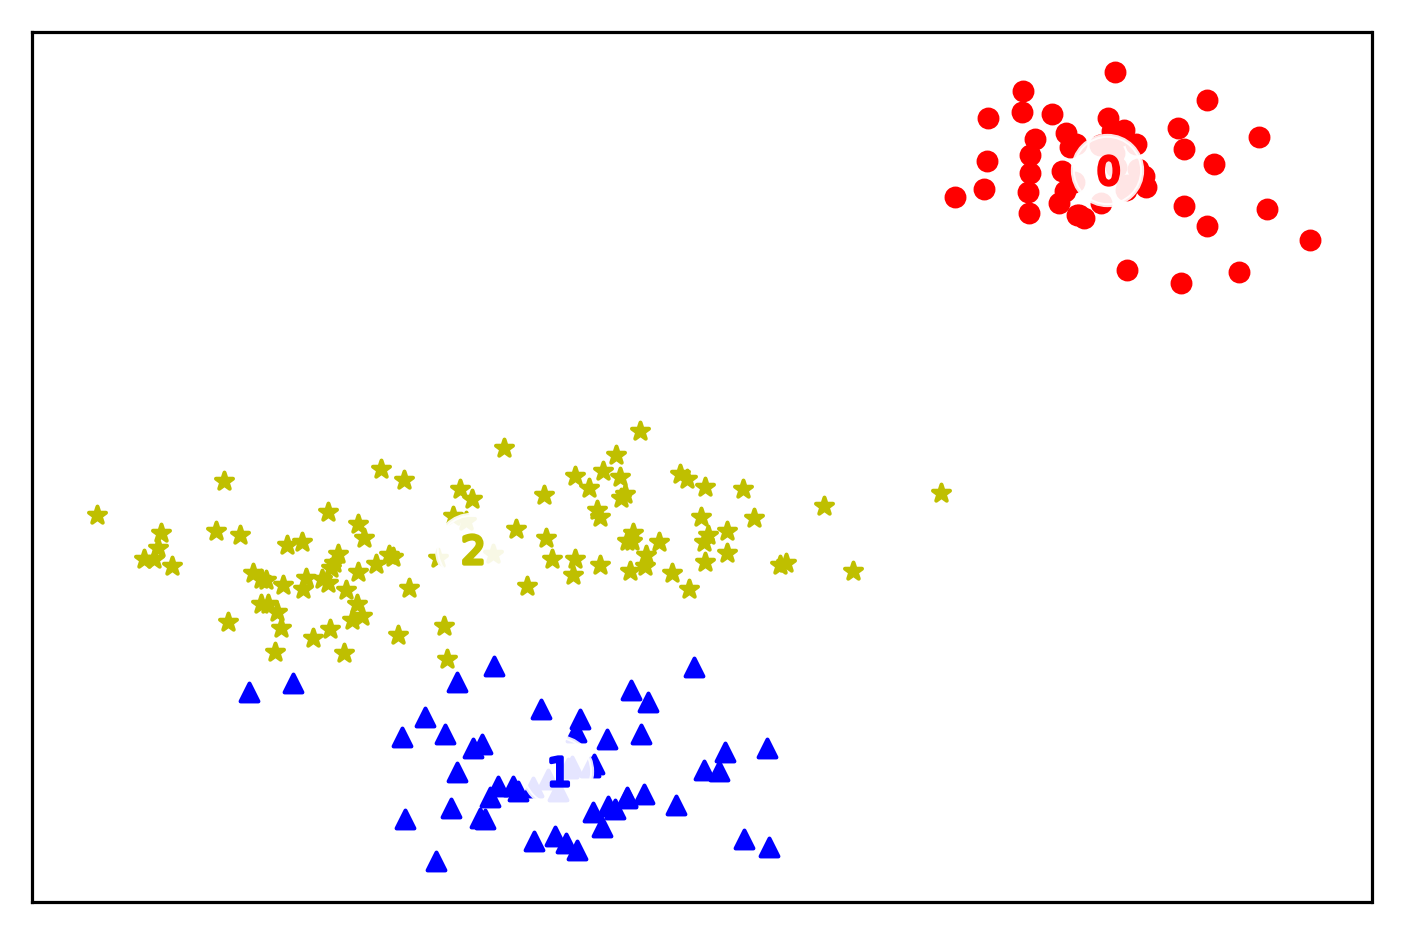

In [8]:
markers = ['o', '^', '*']
colors = ['r', 'b', 'y']

plt.figure(figsize=(6, 4), dpi=144)

plt.xticks(())
plt.yticks(())

# 画出样本
for c in range(n_clusters):
    cluster = X[labels == c]
    plt.scatter(
        cluster[:, 0], cluster[:, 1], marker=markers[c], s=20, c=colors[c])

# 画出中心点
plt.scatter(
    centers[:, 0], centers[:, 1], marker='o', c='white', alpha=0.9, s=300)
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])
plt.show()

$k$ 的值越多，成本越低。这一点也比较好理解，极端情况下，每一个点自己就是聚类中心，成本为 $0$。

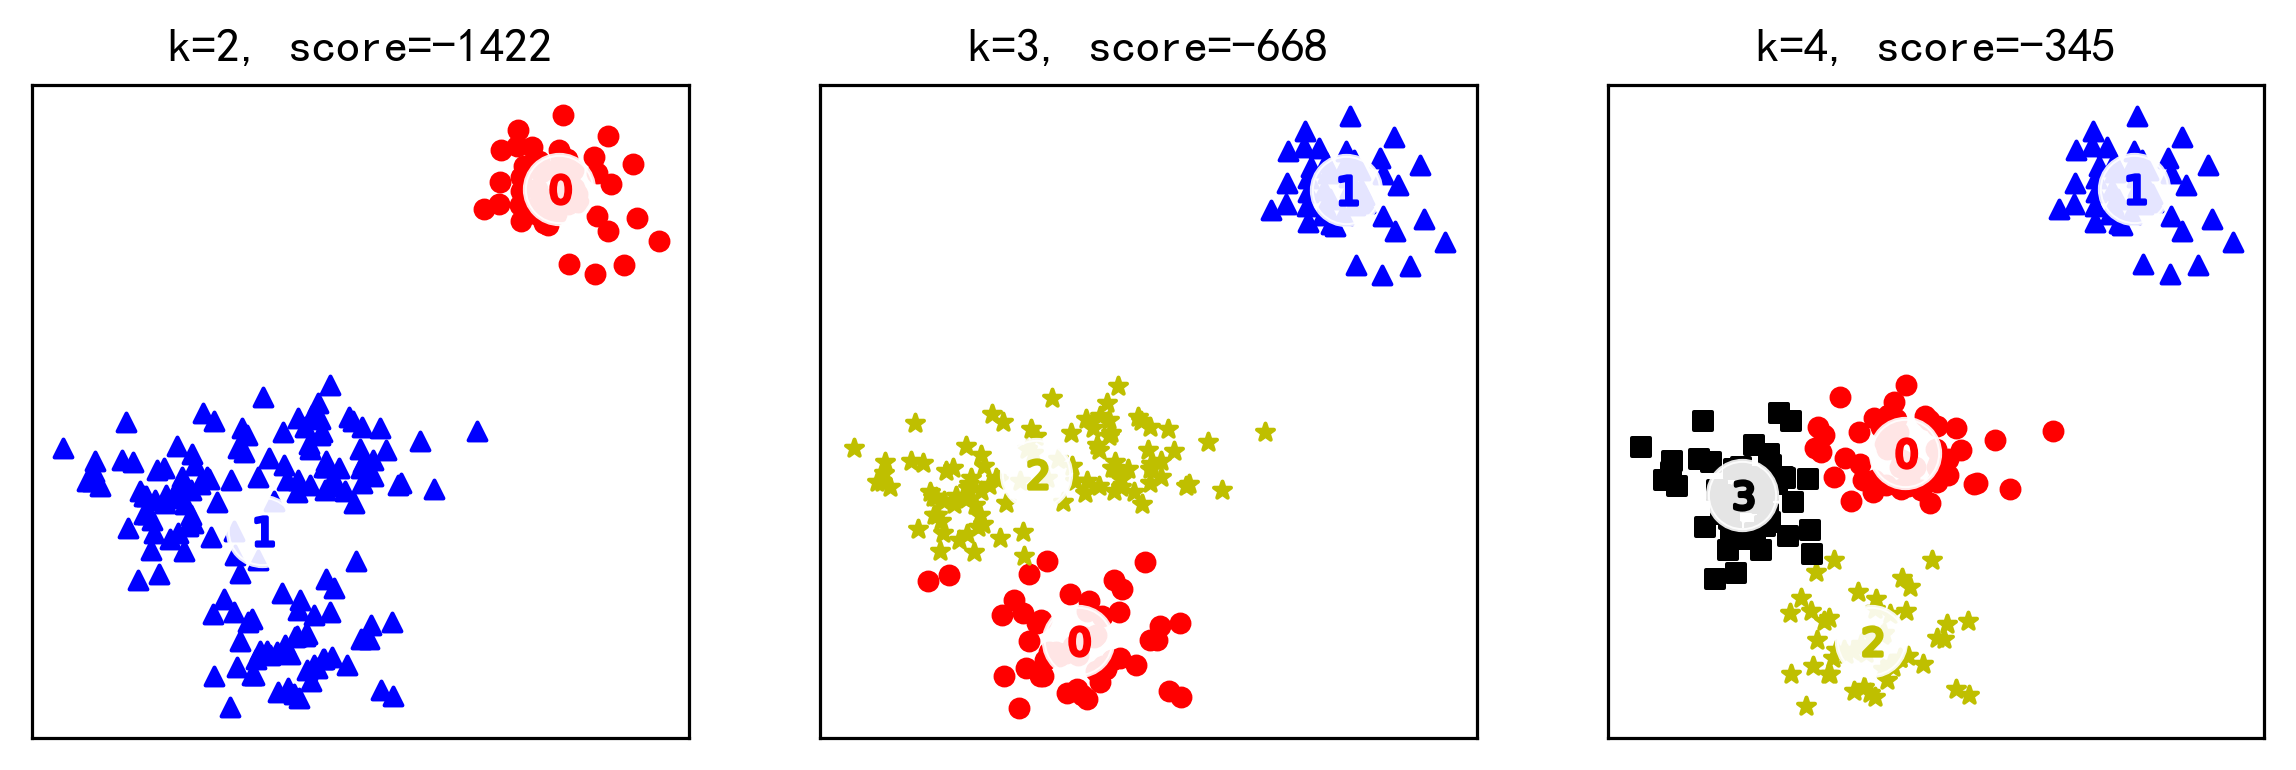

In [9]:
def fit_plot_kmean_model(n_clusters, X):
    plt.xticks(())
    plt.yticks(())

    # 使用 k-均值聚类算法进行拟合
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit(X)

    labels = kmean.labels_
    centers = kmean.cluster_centers_
    markers = ['o', '^', '*', 's']
    colors = ['r', 'b', 'y', 'k']

    score = kmean.score(X)

    plt.title("k={}, score={}".format(n_clusters, int(score)))

    # 画出样本
    for c in range(n_clusters):
        cluster = X[labels == c]
        plt.scatter(
            cluster[:, 0], cluster[:, 1], marker=markers[c], s=20, c=colors[c])

    # 画出中心点
    plt.scatter(
        centers[:, 0], centers[:, 1], marker='o', c='white', alpha=0.9, s=300)
    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, c=colors[i])


from sklearn.cluster import KMeans

n_clusters = [2, 3, 4]
plt.figure(figsize=(10, 3), dpi=144)
for index, c in enumerate(n_clusters):
    plt.subplot(1, 3, index + 1)
    fit_plot_kmean_model(c, X)

plt.show()